In [14]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [15]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 96FF-6D42

 Directory of C:\Users\radhi\Desktop\Assignments of Radhika\SLR

02-01-2023  18:10    <DIR>          .
30-12-2022  10:51    <DIR>          ..
03-12-2022  16:53    <DIR>          .ipynb_checkpoints
05-12-2022  10:41               194 delivery_time.csv
02-01-2023  18:05           128,949 Delivery_Time.ipynb
03-12-2022  13:40               318 Problem_statements.txt
03-12-2022  13:40               454 Salary_Data.csv
02-01-2023  18:10           108,001 SLR_Salary.ipynb
               5 File(s)        237,916 bytes
               3 Dir(s)  77,067,546,624 bytes free


In [16]:
salary=pd.read_csv("Salary_Data.csv")

In [17]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Understanding

In [18]:
salary.shape

(30, 2)

In [19]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [20]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [21]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [22]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Visualization

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

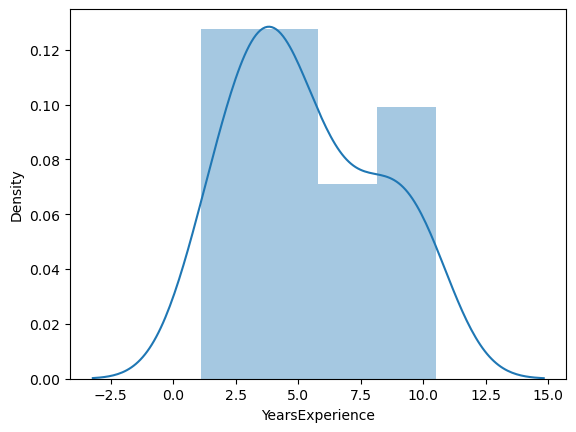

In [25]:
sns.distplot(salary['YearsExperience'])

# Creating model with statsmodel

In [27]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

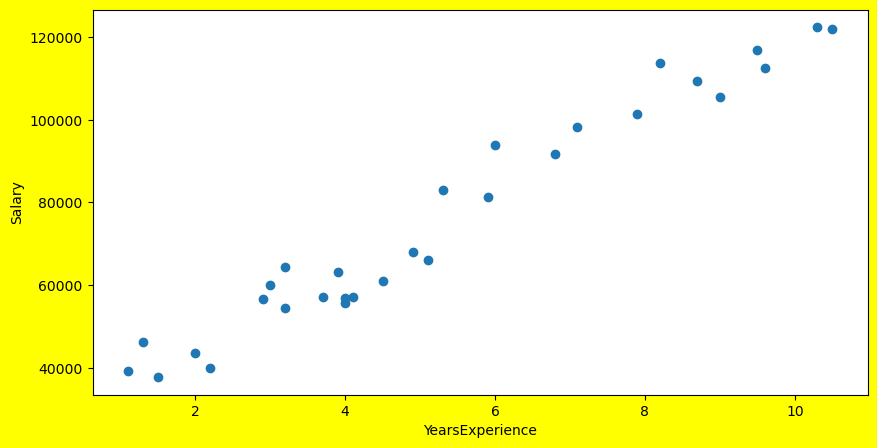

In [28]:
plt.figure(figsize=(10,5),facecolor="yellow")
plt.scatter(salary.YearsExperience,salary.Salary)
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [29]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [30]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [31]:
first_model=smf.ols("YearsExperience~Salary",data=salary).fit()

In [32]:
first_model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [33]:
first_model.predict()

array([ 1.60093427,  2.29581922,  1.43769402,  2.02442725,  1.65642785,
        3.35272891,  3.70796884,  3.13024825,  4.14290484,  3.40812122,
        4.01865188,  3.26685563,  3.38462759,  3.39718453,  3.80528514,
        4.49662579,  4.30330965,  6.03080053,  5.85611727,  7.12973546,
        6.90674848,  7.56851956,  7.87525325,  9.14208664,  8.69844179,
        8.30867027,  9.46178233,  9.02289696, 10.01084473,  9.95828786])

In [34]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        18:12:41   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
first_model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [36]:
first_model.predict()

array([ 1.60093427,  2.29581922,  1.43769402,  2.02442725,  1.65642785,
        3.35272891,  3.70796884,  3.13024825,  4.14290484,  3.40812122,
        4.01865188,  3.26685563,  3.38462759,  3.39718453,  3.80528514,
        4.49662579,  4.30330965,  6.03080053,  5.85611727,  7.12973546,
        6.90674848,  7.56851956,  7.87525325,  9.14208664,  8.69844179,
        8.30867027,  9.46178233,  9.02289696, 10.01084473,  9.95828786])

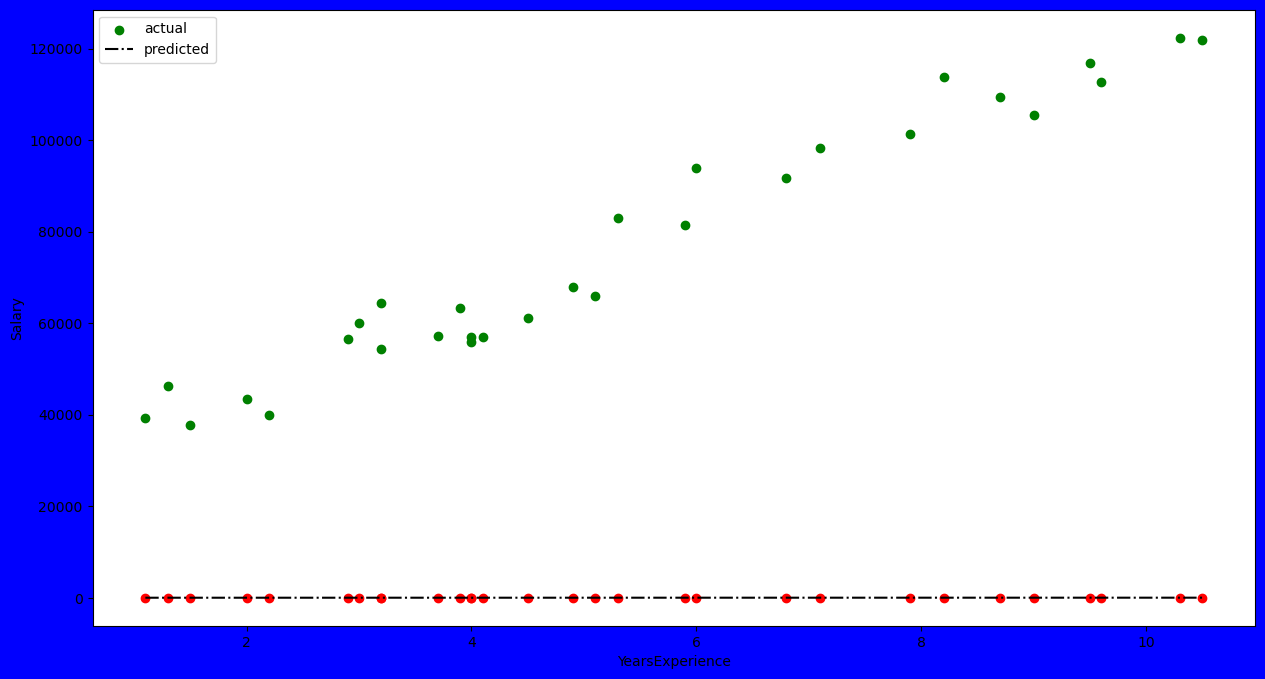

In [37]:
plt.figure(figsize=(15,8),facecolor="blue")
plt.scatter(salary.YearsExperience,salary.Salary,color="green",label="actual");
plt.plot(salary.YearsExperience,first_model.predict(),label="predicted",color="black",linestyle="-.");
plt.scatter(salary.YearsExperience,first_model.predict(),color="red")
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.legend(loc="best")
plt.show()


# Doing Log Transformation

In [39]:
second_model = smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        18:13:49   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
second_model.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [41]:
second_model.predict()

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

# Exponential Transformation

In [43]:
third_model = smf.ols('np.log(Salary)~(YearsExperience)',data=salary).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        18:14:55   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
third_model.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [45]:
third_model.predict()

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

# Doing Square Transformation

In [46]:
salary["YearsExperience"]=salary.YearsExperience**2
fourth_model = smf.ols("np.log(Salary)~YearsExperience+YearsExperience",data=salary).fit()
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.32e-12
Time:                        18:16:27   Log-Likelihood:                 15.229
No. Observations:                  30   AIC:                            -26.46
Df Residuals:                      28   BIC:                            -23.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8139      0.041    266.355      0.000      10.731      10.897
YearsExperience     0.0100      0.001     12.064      0.000       0.008       0.012
==============================================================================
Omnibus:                        0.711   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.787
Skew:                          -0.263   Prob(JB):                        0.675
Kurtosis:                       2.406   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
fourth_model.params

Intercept          10.813942
YearsExperience     0.009996
dtype: float64

In [50]:
first_model.predict()

array([ 1.60093427,  2.29581922,  1.43769402,  2.02442725,  1.65642785,
        3.35272891,  3.70796884,  3.13024825,  4.14290484,  3.40812122,
        4.01865188,  3.26685563,  3.38462759,  3.39718453,  3.80528514,
        4.49662579,  4.30330965,  6.03080053,  5.85611727,  7.12973546,
        6.90674848,  7.56851956,  7.87525325,  9.14208664,  8.69844179,
        8.30867027,  9.46178233,  9.02289696, 10.01084473,  9.95828786])

In [51]:
final_model=first_model
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        18:17:18   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
final_model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [53]:
final_model.predict()

array([ 1.60093427,  2.29581922,  1.43769402,  2.02442725,  1.65642785,
        3.35272891,  3.70796884,  3.13024825,  4.14290484,  3.40812122,
        4.01865188,  3.26685563,  3.38462759,  3.39718453,  3.80528514,
        4.49662579,  4.30330965,  6.03080053,  5.85611727,  7.12973546,
        6.90674848,  7.56851956,  7.87525325,  9.14208664,  8.69844179,
        8.30867027,  9.46178233,  9.02289696, 10.01084473,  9.95828786])